# Deep Learning Indonesia.AI
Pertemuan - 6 Overfitting & Underfitting

# Import Library

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

plt.style.use('ggplot')

# Generate Data

In [16]:
def get_train():
    seq = [[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]
    seq = np.array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape(len(X), 1, 1)
    
    return X, y

In [17]:
def get_validation():
    seq = [[0.5, 0.6], [0.6, 0.7], [0.7, 0.8], [0.8, 0.9], [0.9, 1.0]]
    seq = np.array(seq)
    X, y = seq[:, 0], seq[:, 1]
    X = X.reshape(len(X), 1, 1)
    
    return X, y

# Test Model

## Underfit Model

### Model 1

In [18]:
model_underfitting = Sequential()
model_underfitting.add(LSTM(10, input_shape=(1,1)))
model_underfitting.add(Dense(1, activation='linear'))

model_underfitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_underfitting = model_underfitting.fit(X, y, epochs=100, validation_data=(val_X, val_y), shuffle=False) # less epochs

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1152 - accuracy: 0.0000e+00 - val_loss: 0.6905 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 42ms/step - loss: 0.1138 - accuracy: 0.0000e+00 - val_loss: 0.6858 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1124 - accuracy: 0.0000e+00 - val_loss: 0.6811 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1111 - accuracy: 0.0000e+00 - val_loss: 0.6765 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 33ms/step - loss: 0.1097 - accuracy: 0.0000e+00 - val_loss: 0.6719 - val_accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 0.1084 - accuracy: 0.0000e+00 - val_loss: 0.6673 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 98ms/step - loss: 0.1070 - accuracy: 0.0000e+00 - val_loss: 

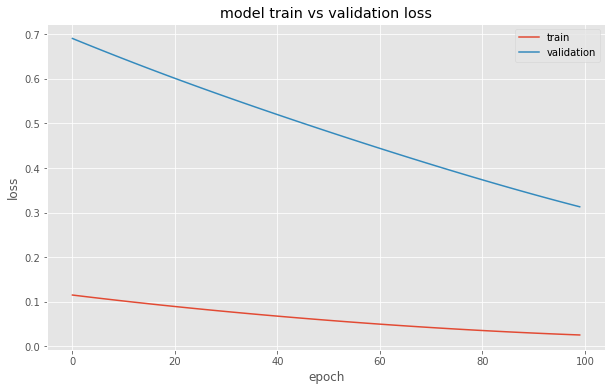

In [19]:
# plot train and validation loss
plt.figure(figsize=(10,6))
plt.plot(history_underfitting.history['loss'])
plt.plot(history_underfitting.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### Model 2

In [20]:
# set LSTM unit to 1 and optimizer to sgd
model_underfitting2 = Sequential()
model_underfitting2.add(LSTM(1, input_shape=(1,1))) # insufficient memory cells
model_underfitting2.add(Dense(1, activation='linear'))

model_underfitting2.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_underfitting2 = model_underfitting2.fit(X, y, epochs=300, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.1179 - accuracy: 0.0000e+00 - val_loss: 0.7104 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 34ms/step - loss: 0.1132 - accuracy: 0.0000e+00 - val_loss: 0.6974 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 36ms/step - loss: 0.1087 - accuracy: 0.0000e+00 - val_loss: 0.6848 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 41ms/step - loss: 0.1044 - accuracy: 0.0000e+00 - val_loss: 0.6726 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 36ms/step - loss: 0.1003 - accuracy: 0.0000e+00 - val_loss: 0.6608 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 31ms/step - loss: 0.0965 - accuracy: 0.0000e+00 - val_loss: 0.6494 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 39ms/step - loss: 0.0928 - accuracy: 0.0000e+00 - val_loss: 

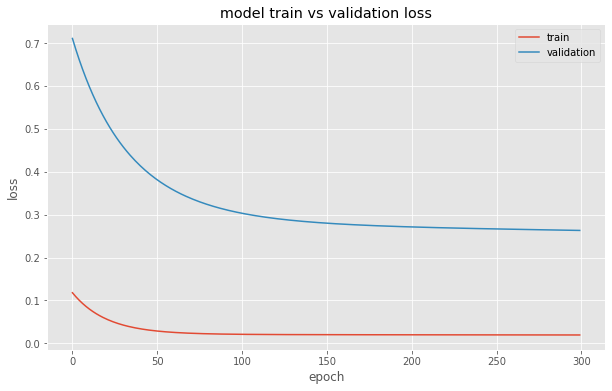

In [21]:
# plot train and validation loss
plt.figure(figsize=(10,6))
plt.plot(history_underfitting2.history['loss'])
plt.plot(history_underfitting2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Overfit Model

In [22]:
# set epochs to 1200 (too many training epochs)
model_overfitting = Sequential()
model_overfitting.add(LSTM(10, input_shape=(1,1)))
model_overfitting.add(Dense(1, activation='linear'))

model_overfitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_overfitting = model_overfitting.fit(X, y, epochs=1200, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/1200
1/1 [==============================] - 3s 3s/step - loss: 0.1249 - accuracy: 0.0000e+00 - val_loss: 0.7649 - val_accuracy: 0.0000e+00
Epoch 2/1200
1/1 [==============================] - 0s 35ms/step - loss: 0.1234 - accuracy: 0.0000e+00 - val_loss: 0.7592 - val_accuracy: 0.0000e+00
Epoch 3/1200
1/1 [==============================] - 0s 36ms/step - loss: 0.1219 - accuracy: 0.0000e+00 - val_loss: 0.7537 - val_accuracy: 0.0000e+00
Epoch 4/1200
1/1 [==============================] - 0s 36ms/step - loss: 0.1204 - accuracy: 0.0000e+00 - val_loss: 0.7481 - val_accuracy: 0.0000e+00
Epoch 5/1200
1/1 [==============================] - 0s 41ms/step - loss: 0.1189 - accuracy: 0.0000e+00 - val_loss: 0.7426 - val_accuracy: 0.0000e+00
Epoch 6/1200
1/1 [==============================] - 0s 35ms/step - loss: 0.1174 - accuracy: 0.0000e+00 - val_loss: 0.7371 - val_accuracy: 0.0000e+00
Epoch 7/1200
1/1 [==============================] - 0s 30ms/step - loss: 0.1159 - accuracy: 0.0000e+00 - val

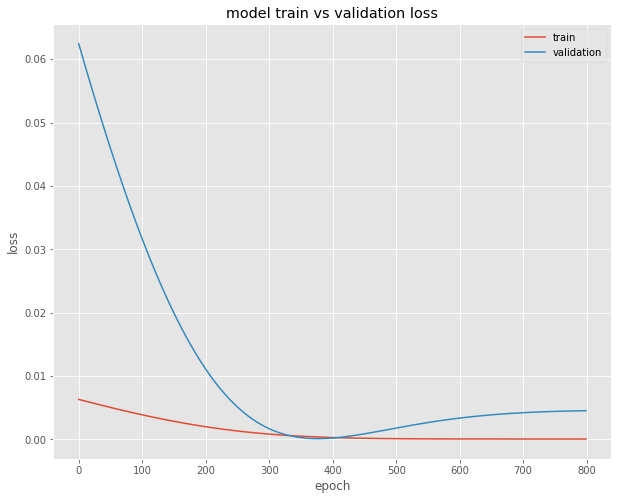

In [23]:
plt.figure(figsize=(10,8))
plt.plot(history_overfitting.history['loss'][400:])
plt.plot(history_overfitting.history['val_loss'][400:])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Fit Model

In [24]:
# set epochs to 600
model_fitting = Sequential()
model_fitting.add(LSTM(10, input_shape=(1,1)))
model_fitting.add(Dense(1, activation='linear'))

model_fitting.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

X, y = get_train()
val_X, val_y = get_validation()
history_fitting = model_fitting.fit(X, y, epochs=650, validation_data=(val_X, val_y), shuffle=False)

Epoch 1/650
1/1 [==============================] - 4s 4s/step - loss: 0.1280 - accuracy: 0.0000e+00 - val_loss: 0.7862 - val_accuracy: 0.0000e+00
Epoch 2/650
1/1 [==============================] - 0s 37ms/step - loss: 0.1265 - accuracy: 0.0000e+00 - val_loss: 0.7808 - val_accuracy: 0.0000e+00
Epoch 3/650
1/1 [==============================] - 0s 41ms/step - loss: 0.1250 - accuracy: 0.0000e+00 - val_loss: 0.7755 - val_accuracy: 0.0000e+00
Epoch 4/650
1/1 [==============================] - 0s 35ms/step - loss: 0.1235 - accuracy: 0.0000e+00 - val_loss: 0.7702 - val_accuracy: 0.0000e+00
Epoch 5/650
1/1 [==============================] - 0s 37ms/step - loss: 0.1220 - accuracy: 0.0000e+00 - val_loss: 0.7649 - val_accuracy: 0.0000e+00
Epoch 6/650
1/1 [==============================] - 0s 38ms/step - loss: 0.1205 - accuracy: 0.0000e+00 - val_loss: 0.7596 - val_accuracy: 0.0000e+00
Epoch 7/650
1/1 [==============================] - 0s 51ms/step - loss: 0.1190 - accuracy: 0.0000e+00 - val_loss: 

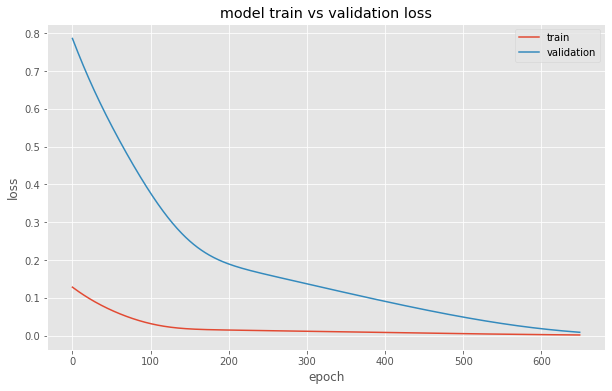

In [29]:
plt.figure(figsize=(10,6))
plt.plot(history_fitting.history['loss'])
plt.plot(history_fitting.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Robust Model

In [26]:
train = pd.DataFrame()
validation = pd.DataFrame()

In [27]:
for i in range(5):
    model_robust = Sequential()
    model_robust.add(LSTM(10, input_shape=(1,1)))
    model_robust.add(Dense(1, activation='linear'))
    
    model_robust.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    X, y = get_train()
    val_X, val_y = get_validation()
    
    history_robust = model_robust.fit(X, y, epochs=300, validation_data=(val_X, val_y), shuffle=False)
    
    train[str(i)] = history_robust.history['loss']
    validation[str(i)] = history_robust.history['val_loss']

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 0.1140 - accuracy: 0.0000e+00 - val_loss: 0.6878 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 31ms/step - loss: 0.1128 - accuracy: 0.0000e+00 - val_loss: 0.6835 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 34ms/step - loss: 0.1115 - accuracy: 0.0000e+00 - val_loss: 0.6792 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 34ms/step - loss: 0.1103 - accuracy: 0.0000e+00 - val_loss: 0.6749 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 30ms/step - loss: 0.1090 - accuracy: 0.0000e+00 - val_loss: 0.6707 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 [==============================] - 0s 34ms/step - loss: 0.1078 - accuracy: 0.0000e+00 - val_loss: 0.6664 - val_accuracy: 0.0000e+00
Epoch 7/300
1/1 [==============================] - 0s 33ms/step - loss: 0.1066 - accuracy: 0.0000e+00 - val_loss: 

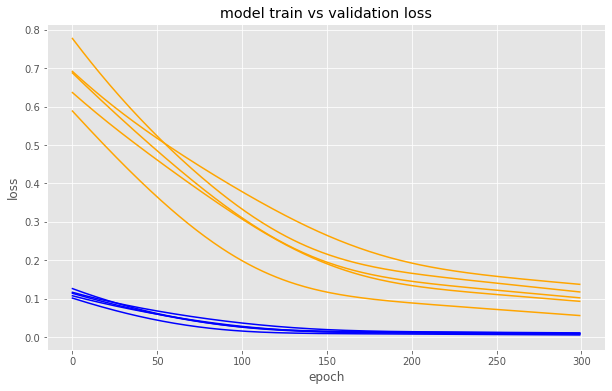

In [32]:
# plot train and validation loss across multiple runs considering stochastic phenomenon
plt.figure(figsize=(10,6))
plt.plot(train, color='blue', label='train')
plt.plot(validation, color='orange', label='validation')
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()